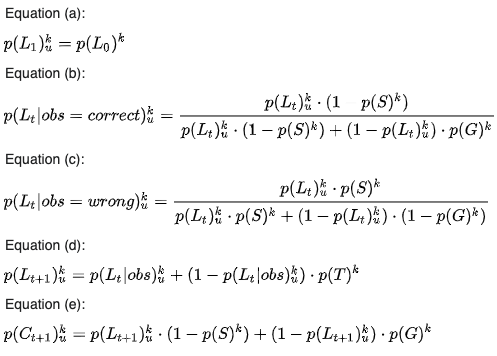

In [ ]:
#@title Initialize Parameters

import numpy as np

def initialize_parameters(pL, pT, pS, pG):
  
  np.random.seed(1)

  pL =  np.random.randn(1)
  pT =  np.random.randn(1)
  pS =  np.random.randn(1)
  pG =  np.random.randn(1)

  parameters = {
      'pL': pL,
      'pT': pT,
      'pS': pS,
      'pG': pG
  }

  return parameters

In [ ]:
#@title Eq. b

def correct_latent(pL, pS, pG, T):

  parameters = {}

  for t in reversed(range(T-1)):
    parameters['pL_correct_obs' + str(t)] = np.dot(pL, (1 - pS))/(np.dot(pL, (1 - pS)) + np.dot((1 - pL), pG))

  return 'pL_correct_obs' + str(t)

In [ ]:
#@title Eq. c

def wrong_latent(pL, pS, pG, T):

  parameters = {}

  for t in reversed(range(T-1)):
    parameters['pL_wrong_obs' + str(t)] = np.dot(pL, pS)/(np.dot(pL, pS) + np.dot((1 - pL), (1 - pG)))

  return 'pL_wrong_obs' + str(t)

In [ ]:
#@title Eq. d

def update_latent(pL_obs, pT, T, condition):

  parameters = {}

  if condition == 'correct':  
    for t in reversed(range(T-1)):
      pL = 'pL_correct_obs' + str(t)
      parameters['pL' + str(t + 1)] = pL + np.multiply((1 - pL), pT)

  elif condition == 'wrong':  
    for t in reversed(range(T-1)):
      pL = 'pL_wrong_obs' + str(t)
      parameters['pL' + str(t + 1)] = pL + np.multiply((1 - pL), pT)
  
  return 'pL' + str(t + 1)

In [ ]:
#@title Eq. e

def observation(pL, pS, pG, T):

  parameters = {}

  for t in reversed(range(T-1)):
    parameters['pC' + str(t + 1)] = np.dot(pL, (1 - pS)) + np.dot((1 - pL), pG)

  return 'pC' + str(t + 1)